# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum*{i=0}^{3} \sum*{j=0}^{3} a\_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0& 0& 0& 0& 1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
-3& 3& 0& 0& -2& -1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
2& -2& 0& 0& 1& 1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0& 0& 0& 0& 0& 0& 0& 0& 1& 0& 0& 0& 0& 0& 0& 0 \\
0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 1& 0& 0& 0 \\
0& 0& 0& 0& 0& 0& 0& 0& -3& 3& 0& 0& -2& -1& 0& 0 \\
0& 0& 0& 0& 0& 0& 0& 0& 2& -2& 0& 0& 1& 1& 0& 0 \\
-3& 0& 3& 0& 0& 0& 0& 0& -2& 0& -1& 0& 0& 0& 0& 0 \\
0& 0& 0& 0& -3& 0& 3& 0& 0& 0& 0& 0& -2& 0& -1& 0 \\
9& -9& -9& 9& 6& 3& -6& -3& 6& -6& 3& -3& 4& 2& 2& 1 \\
-6& 6& 6& -6& -3& -3& 3& 3& -4& 4& -2& 2& -2& -2& -1& -1 \\
2& 0& -2& 0& 0& 0& 0& 0& 1& 0& 1& 0& 0& 0& 0& 0 \\
0& 0& 0& 0& 2& 0& -2& 0& 0& 0& 0& 0& 1& 0& 1& 0 \\
-6& 6& 6& -6& -4& -2& 4& 2& -3& 3& -3& 3& -2& -1& -2& -1 \\
4& -4& -4& 4& 2& 2& -2& -2& 2& -2& 2& -2& 1& 1& 1& 1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):

\begin{equation}
A\*x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}

\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}

\begin{equation}
A\*{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:

- macierz $A^{-1}$ dostępna jest w pliku _a_invert.py_
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.


In [2]:
from ainvert import A_invert as inv_A
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [3]:
def safe_index(f):
    def wrapper(*args):
        try:
            return f(*args)
        except IndexError:
            return 0
    return wrapper


def interpolate_bicubic(img, scale_h, scale_w):
    @safe_index
    def Ax(hx, wx):
        return (img[hx, wx+1] - img[hx, wx-1]) / 2

    @safe_index
    def Ay(hx, wx):
        return (img[hx+1, wx] - img[hx-1, wx]) / 2

    @safe_index
    def Axy(hx, wx):
        return (img[hx+1, wx+1] - img[hx-1, wx+1] - img[hx+1, wx-1] + img[hx-1, wx-1]) / 4

    curr_h, curr_w = img.shape
    new_h = int(curr_h * scale_h)
    new_w = int(curr_w * scale_w)

    img = img.astype(np.int32)
    result = np.zeros((new_h, new_w), dtype=np.int32)
    for i in range(new_h):
        for j in range(new_w):
            A_i = int(i / scale_h)
            A_j = int(j / scale_w)

            B_i = min(A_i, curr_h-1)
            B_j = min(A_j + 1, curr_w-1)

            C_i = min(A_i + 1, curr_h-1)
            C_j = min(A_j + 1, curr_w-1)

            D_i = min(A_i + 1, curr_h-1)
            D_j = min(A_j, curr_w-1)

            x = np.array(
                [img[A_i, A_j], img[B_i, B_j], img[D_i, D_j], img[C_i, C_j],
                 Ax(A_i, A_j),  Ax(B_i, B_j),  Ax(
                     D_i, D_j),  Ax(C_i, C_j),
                 Ay(A_i, A_j),  Ay(B_i, B_j),  Ay(
                     D_i, D_j),  Ay(C_i, C_j),
                 Axy(A_i, A_j), Axy(B_i, B_j), Axy(D_i, D_j), Axy(C_i, C_j)], dtype=np.float64)

            a = inv_A @ x
            a = a.reshape((4, 4)).T

            ratio_h = i / scale_h - A_i
            ratio_w = j / scale_w - A_j

            result[i, j] = np.power(ratio_w, range(
                4)) @ a @ np.power(ratio_h, range(4))

    return np.clip(result, 0, 255)

In [9]:
imgs = ['clock.bmp', 'chessboard.bmp', 'lena.bmp', 'parrot.bmp']
scales = [1, 5, 10, 0.5]
imgs = [cv2.imread(fileName, cv2.IMREAD_GRAYSCALE) for fileName in imgs]

img: 0, scale: 1
img: 0, scale: 5
img: 0, scale: 10
img: 0, scale: 0.5
img: 1, scale: 1
img: 1, scale: 5
img: 1, scale: 10
img: 1, scale: 0.5
img: 2, scale: 1
img: 2, scale: 5
img: 2, scale: 10
img: 2, scale: 0.5
img: 3, scale: 1
img: 3, scale: 5
img: 3, scale: 10
img: 3, scale: 0.5


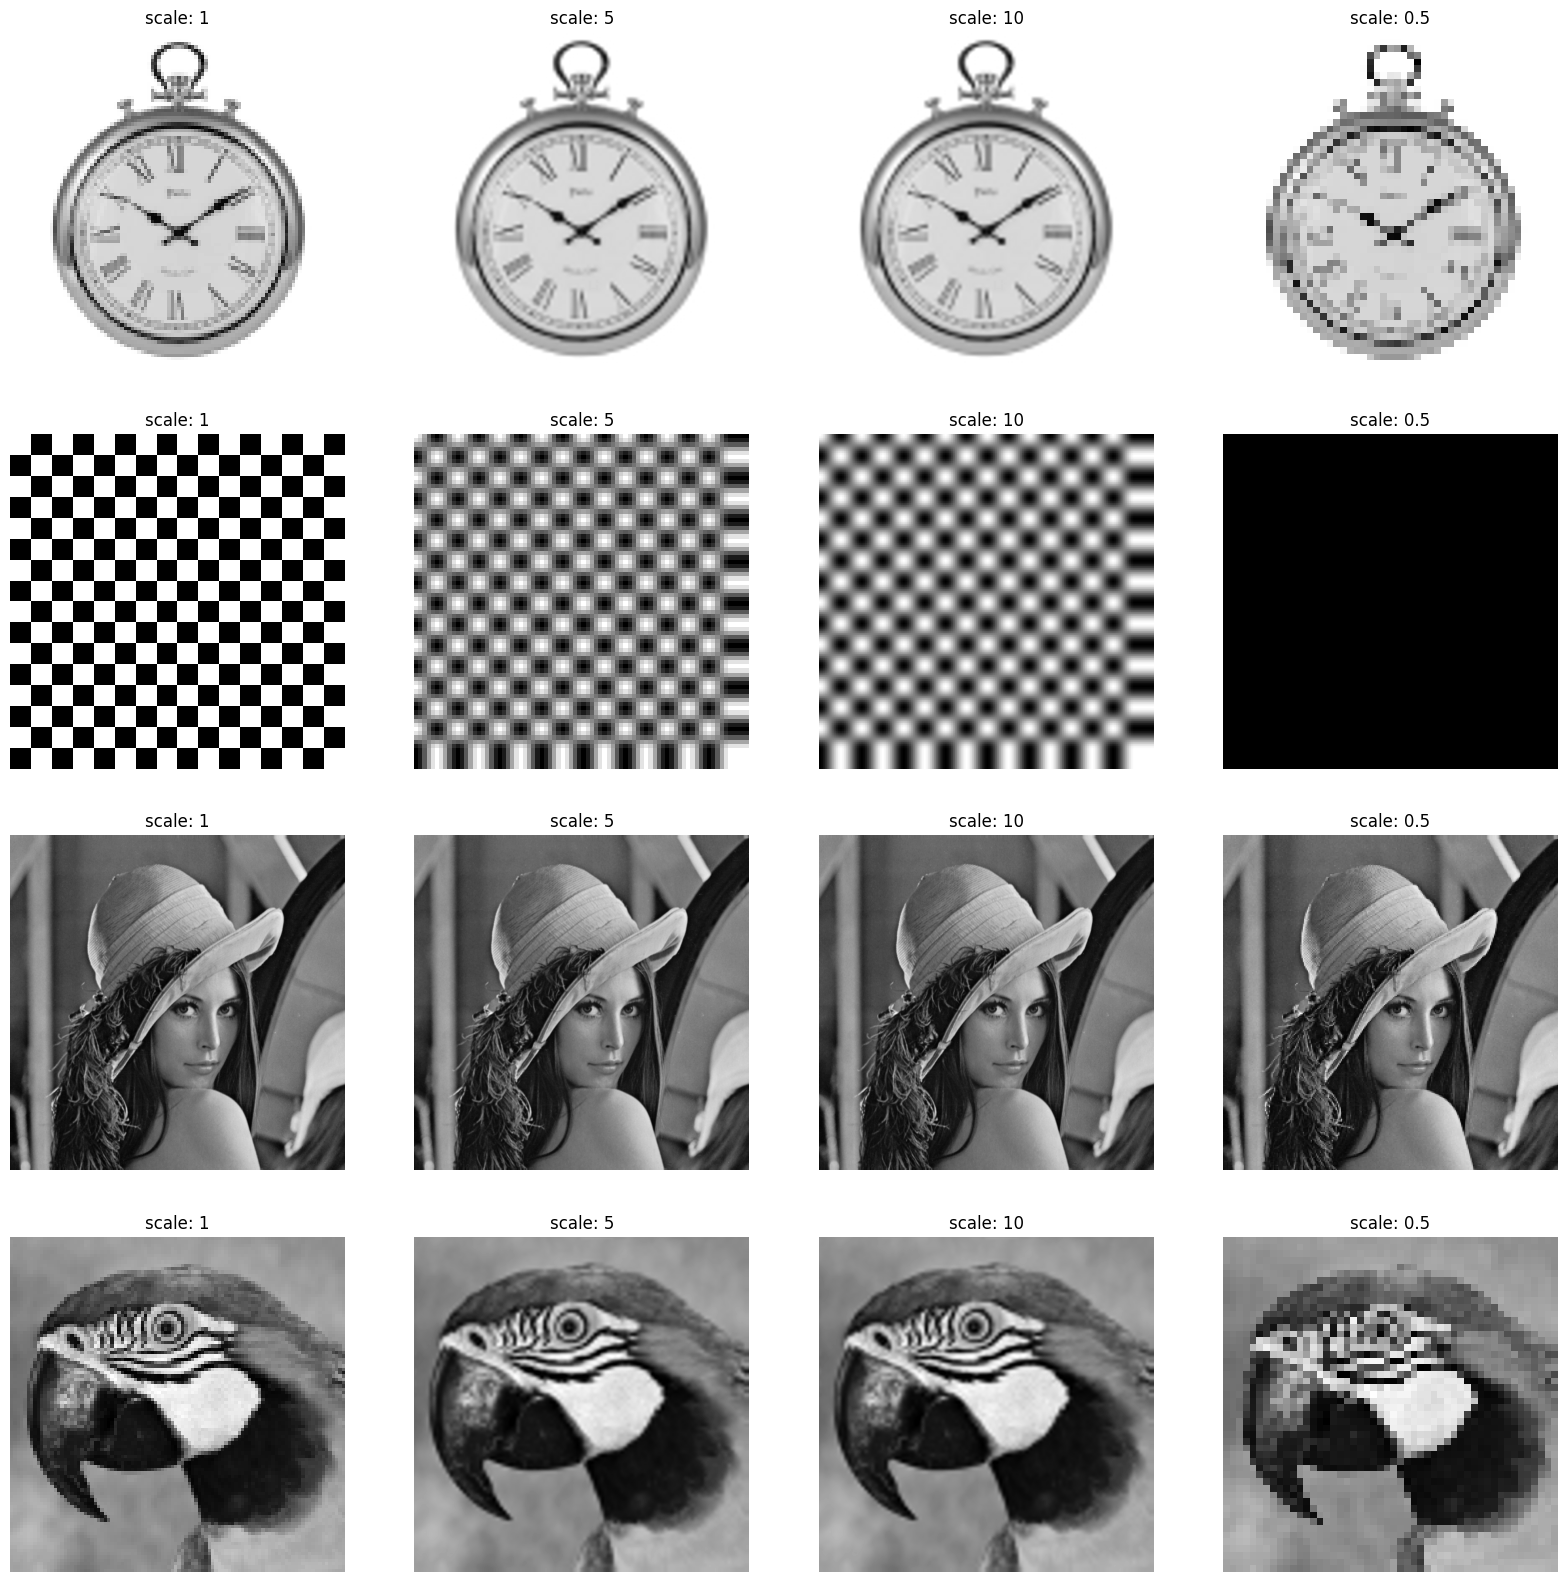

In [10]:

fig, axs = plt.subplots(len(imgs), len(scales), figsize=(20, 20))

for i, img in enumerate(imgs):
    for j, scale in enumerate(scales):
        axs[i, j].imshow(interpolate_bicubic(img, scale, scale), cmap='gray')
        axs[i, j].axis('off')
        axs[i, j].set_title(f'scale: {scale}')
        print(f'img: {i}, scale: {scale}')

plt.show()